In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
customer_data = pd.read_csv('Wholesale customers data.csv')
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
customer_data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
customer_data['Channel'].nunique()

2

In [5]:
customer_data['Region'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
scaled_data = customer_data[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

# K-Means Clustering

In [8]:
kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(scaled_data)
labels = kmean.labels_

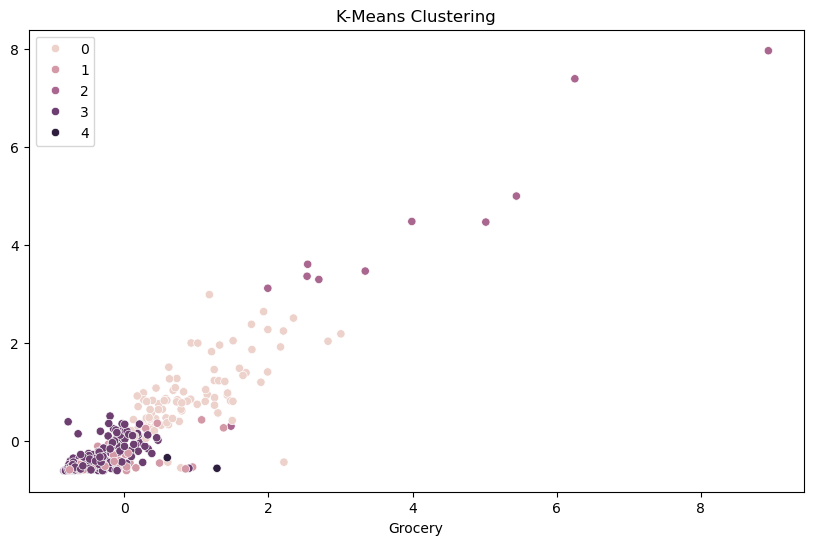

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 2], y=scaled_data[:, 4], hue=labels)
plt.xlabel('Fresh')
plt.xlabel('Grocery')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Evaluating the Optimal Number of Clusters

In [10]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

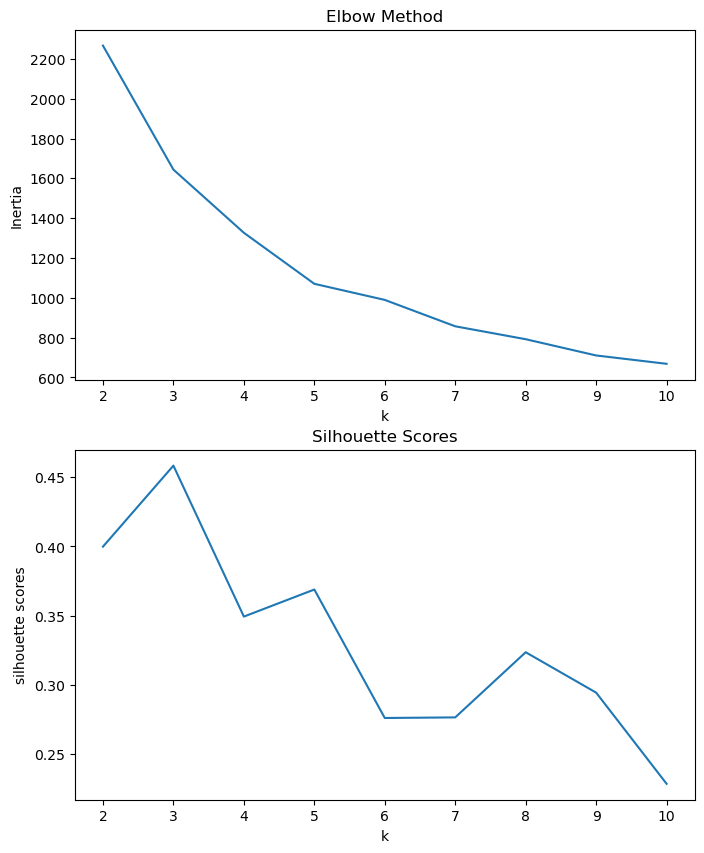

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes = axes.flatten()
axes[0].plot(k_range, inertias)
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')
axes[1].plot(k_range, silhouette_scores)
axes[1].set_title('Silhouette Scores')
axes[1].set_xlabel('k')
axes[1].set_ylabel('silhouette scores')

plt.show()

# Cluster Analysis and Interpretation

In [12]:
scaled_df = pd.DataFrame(scaled_data, columns=['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'])

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)
scaled_df['clusters'] = kmeans.labels_

In [14]:
cluster_profile = scaled_df.groupby('clusters').agg({
    'Fresh': ['mean', 'min', 'max', 'count'], 'Grocery': ['mean', 'min', 'max']
}).reset_index()

cluster_profile.columns = ['Cluster', 'Fresh Mean', 'Fresh Min', 'Fresh Max', 'Count', 'Grocery Mean', 'Grocery Min', 'Grocery Max']

In [15]:
print(cluster_profile)

   Cluster  Fresh Mean  Fresh Min  Fresh Max  Count  Grocery Mean  \
0        0   -0.242604  -0.949683   1.568256    350     -0.221572   
1        1    1.784209  -0.555476   7.927738     53     -0.192645   
2        2   -0.260860  -0.943192   2.569923     37      2.371905   

   Grocery Min  Grocery Max  
0    -0.837334     2.215964  
1    -0.788032     1.379080  
2     0.591605     8.936528  


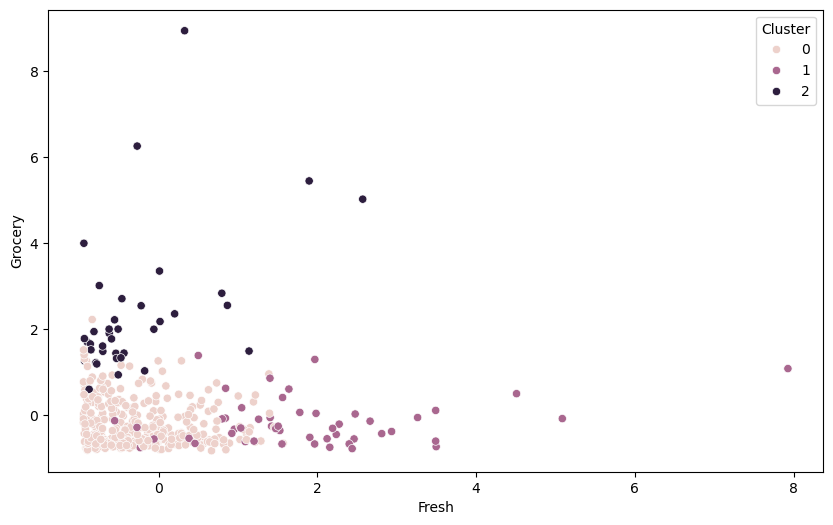

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fresh', y='Grocery', hue='clusters', data=scaled_df)

plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.legend(title='Cluster')
plt.show()

# Hierarchical Clustering: Dendrogram and Cluster Formation

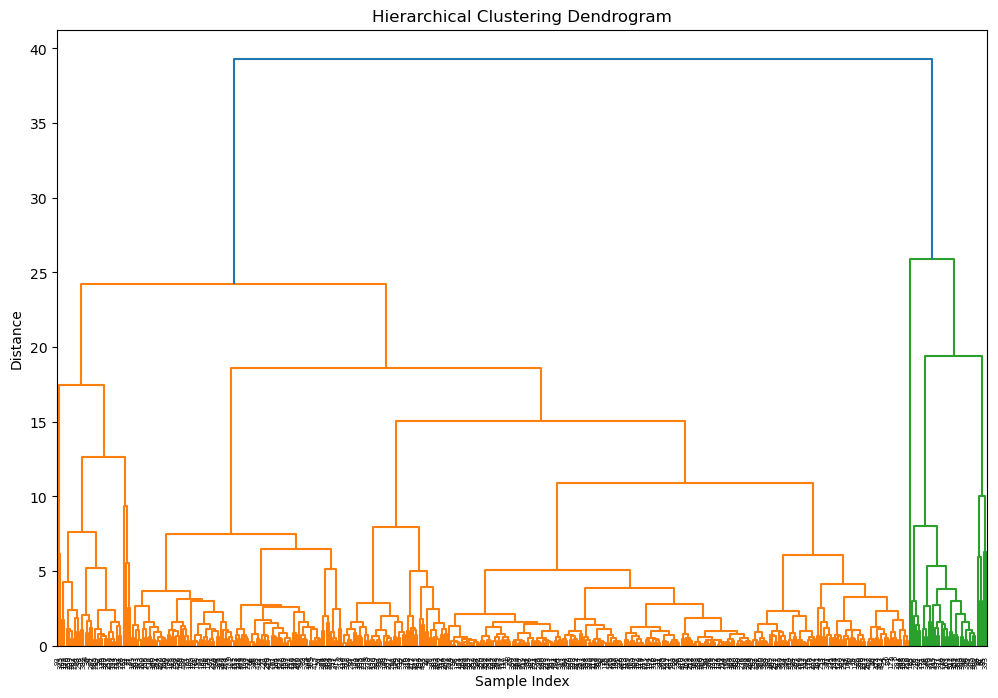

In [17]:
linkage_matrix = linkage(scaled_df, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [18]:
max_d = 5 
clusters_hierarchical = fcluster(linkage_matrix, max_d, criterion='maxclust')

scaled_df['cluster_hierarchical'] = clusters_hierarchical

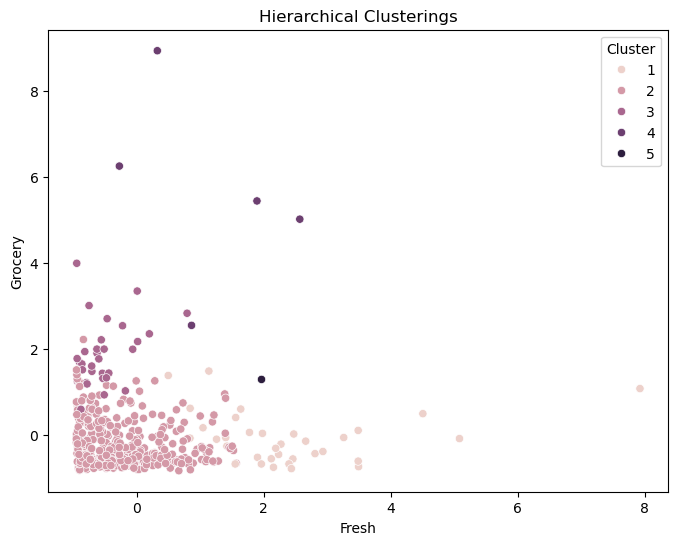

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Grocery', hue='cluster_hierarchical', data=scaled_df)
plt.title('Hierarchical Clusterings')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.legend(title='Cluster')
plt.show()